# HR Analytics Project- Understanding the Attrition in HR
### Project Description
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?
### HR Analytics
Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.
### Attrition in HR
Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.
### Attrition affecting Companies
A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.


In [1]:
# importing requried libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading data
df = pd.read_csv("HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


Our dataset has 1470 rows and 35 columns. Attrition is the target variable and others are features. Looks like most of the columns contain categorical variables.

### Exploratory Data Analysis (EDA)

In [3]:
# checking shape
print(df.shape)
print('Dataset has',df.shape[0],'rows and',df.shape[1],'columns.')

(1470, 35)
Dataset has 1470 rows and 35 columns.


In [4]:
# columns name
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
# data types of columns
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

There are two data types int64 and object.

In [6]:
# checking null values
print("Null values in columns -")
print(df.isnull().sum())
print("\nTotal null values in dataset - ",df.isnull().sum().sum())

Null values in columns -
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentR

No null values present in the dataset.

In [7]:
print('Duplicate rows =',df.duplicated().sum())
if df.duplicated().sum()!=0:
    print(df.duplicated().sum(),'duplicate rows present in the dataset')
else:
    print('No duplicate rows present in the dataset')    

Duplicate rows = 0
No duplicate rows present in the dataset


In [8]:
# creating function for checking columns unique values
def value_count(dataframe):
    for i in dataframe.columns:
        print('Total unique values in',i,'column -',dataframe[i].nunique())
        print(dataframe[i].value_counts())
        print('_'*50,'\n')    

In [9]:
value_count(df)

Total unique values in Age column - 43
35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64
__________________________________________________ 

Total unique values in Attrition column - 2
No     1233
Yes     237
Name: Attrition, dtype: int64
__________________________________________________ 

Total unique values in BusinessTravel column - 3
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
__________________________________________________ 

Total unique values in DailyRate column - 886
691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316  

Most of the columns have categorical variables. Columns Over18,StandardHours and EmployeeCount contain only one unique value. EmployeeNumber is the identifier column.

In [10]:
# removing irrelevant columns
df.drop(columns=['EmployeeNumber','Over18','StandardHours','EmployeeCount'],axis=1,inplace=True)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

Now we have 31 columns including target variable. Attrition is our target variable and others are features.

In [12]:
# Statistical description of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.00,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0


In [13]:
# checking description of categorical columns
df.describe(include=[object])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,No
freq,1233,1043,961,606,882,326,673,1054


### Data visualization

In [14]:
def plot(name):
    plt.figure(figsize = (28,35), facecolor = 'white')
    plotnumber = 1

    for i in name:
        if plotnumber <= 50:
            ax = plt.subplot(8, 4 , plotnumber)
            plot_name(df[i],color='orange')
            plt.xlabel(i, fontsize = 16)
            plotnumber +=1
    plt.show()

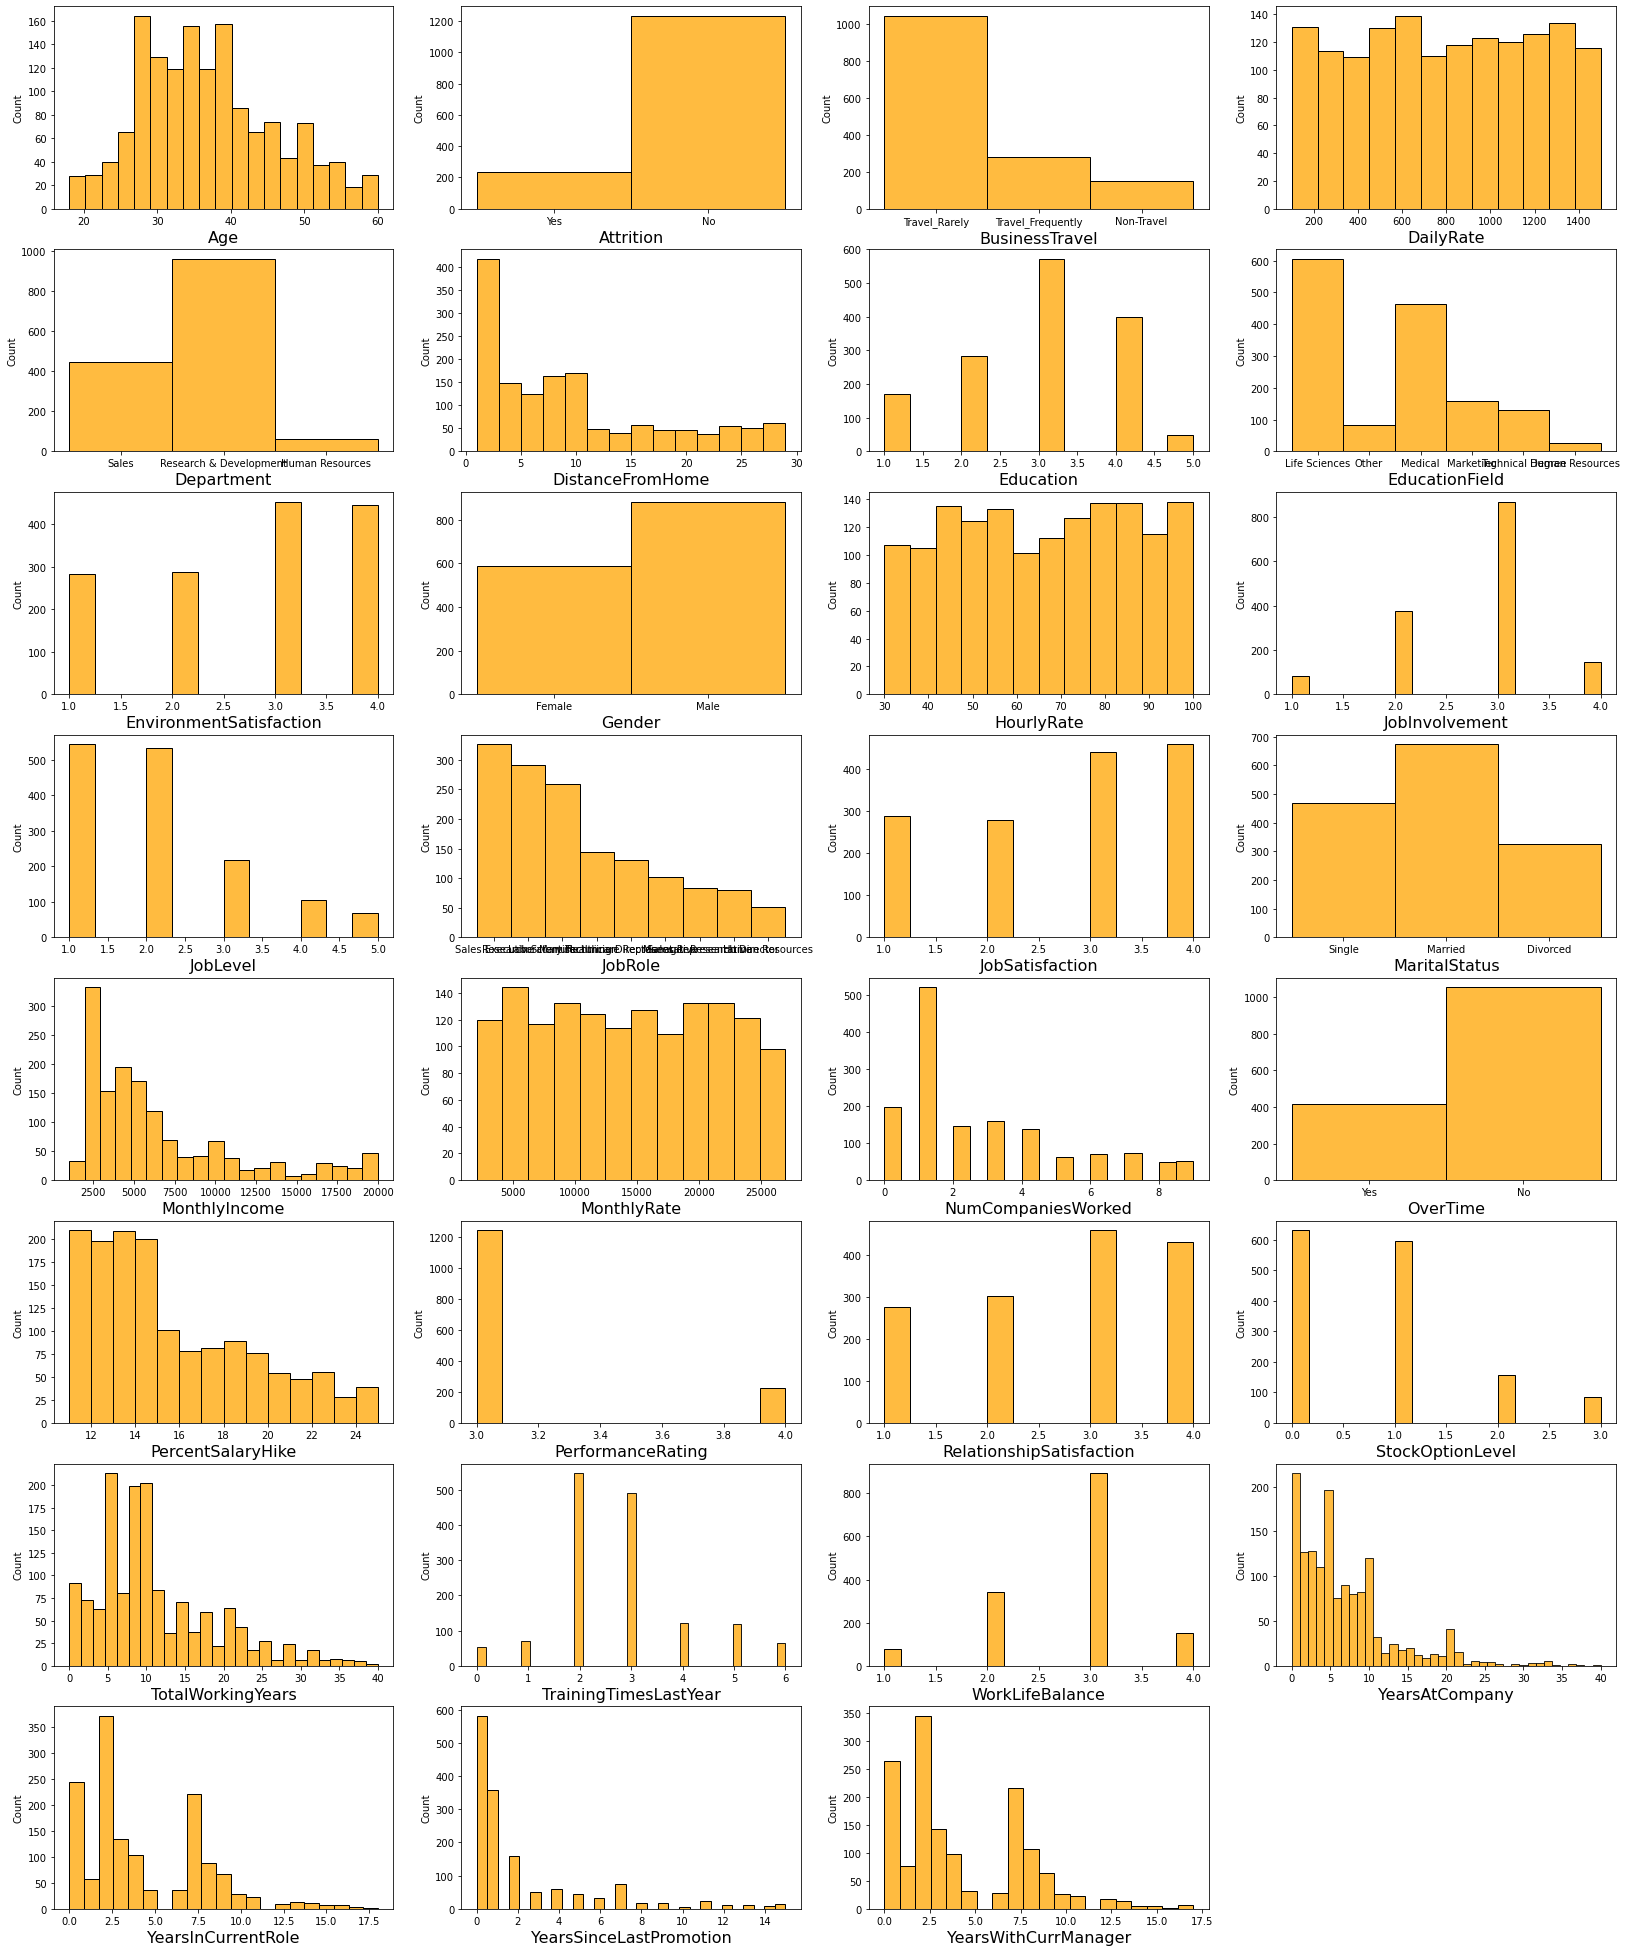

In [15]:
# histogram plot
plot_name=sns.histplot
plot(df)

No     1233
Yes     237
Name: Attrition, dtype: int64


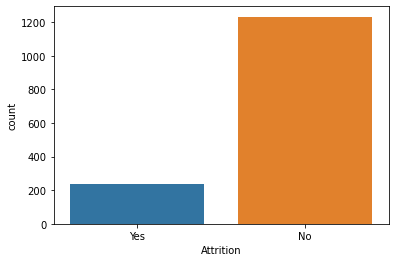

In [16]:
# count plot
sns.countplot(x='Attrition',data=df)
print(df['Attrition'].value_counts())

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


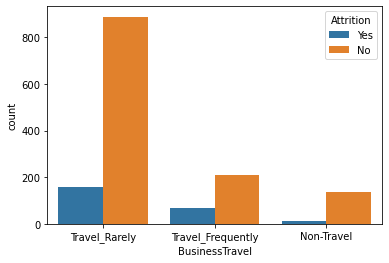

In [17]:
# count plot
sns.countplot(x='BusinessTravel',hue='Attrition',data=df)
print(df['BusinessTravel'].value_counts())

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64


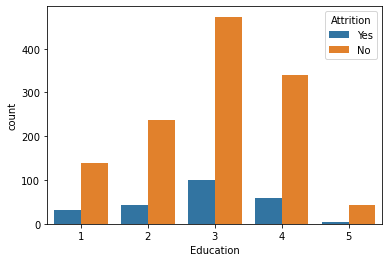

In [18]:
# count plot
sns.countplot(x='Education',hue='Attrition',data=df)
print(df['Education'].value_counts())

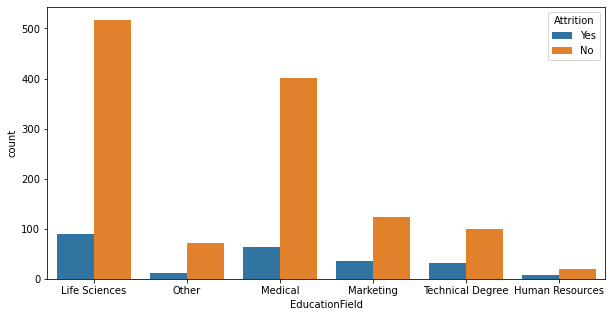

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(x='EducationField',hue='Attrition',data=df)
plt.show()

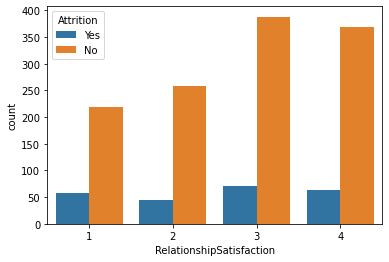

In [20]:
sns.countplot(x='RelationshipSatisfaction',hue='Attrition',data=df)
plt.show()

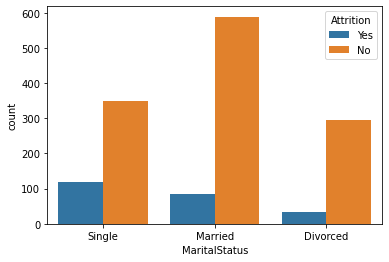

In [21]:
sns.countplot(x='MaritalStatus',hue='Attrition',data=df)
plt.show()

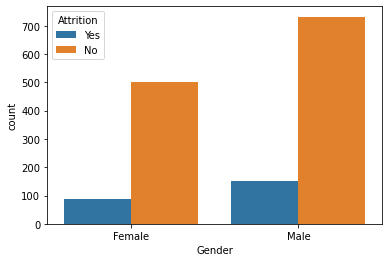

In [22]:
sns.countplot(x='Gender',hue='Attrition',data=df)
plt.show()

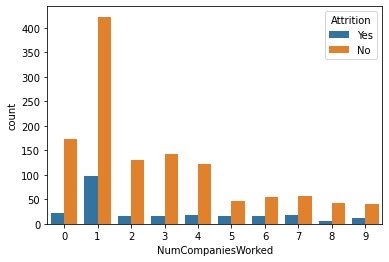

In [23]:
sns.countplot(x='NumCompaniesWorked',hue='Attrition',data=df)
plt.show()

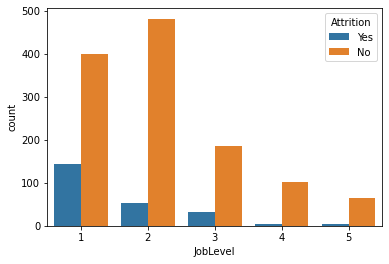

In [24]:
sns.countplot(x='JobLevel',hue='Attrition',data=df)
plt.show()

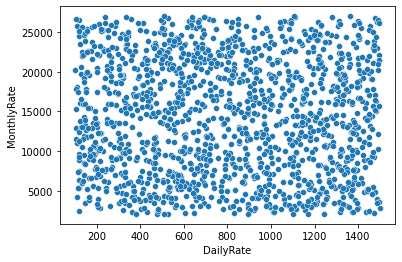

In [25]:
# scatter plot
sns.scatterplot(x='DailyRate',y='MonthlyRate',data=df)
plt.show()

we can not confirm any relation here.

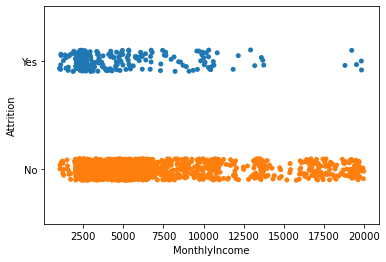

In [26]:
# strip plot
sns.stripplot(x='MonthlyIncome',y='Attrition',data=df)
plt.show()

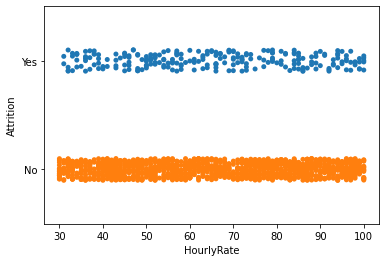

In [27]:
# strip plot
sns.stripplot(x='HourlyRate',y='Attrition',data=df)
plt.show()

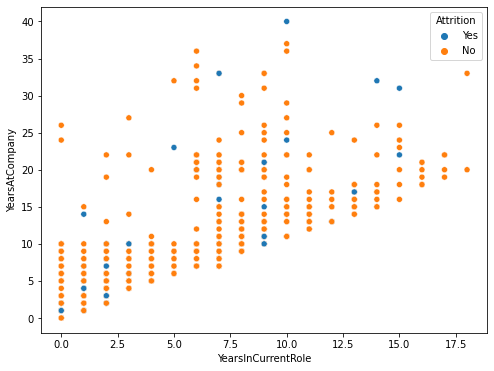

In [28]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='YearsInCurrentRole',y='YearsAtCompany',hue='Attrition',data=df)
plt.show()

YearAtCompany and YearInCurrentRole have positive relation.

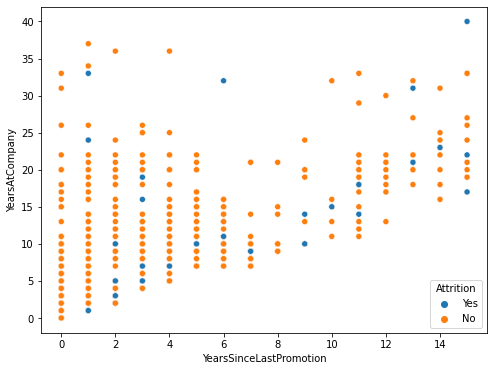

In [29]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='YearsSinceLastPromotion',y='YearsAtCompany',hue='Attrition',data=df)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

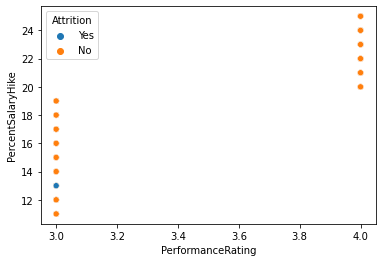

In [30]:
sns.scatterplot(x='PerformanceRating',y='PercentSalaryHike',hue='Attrition',data=df)
plt.show

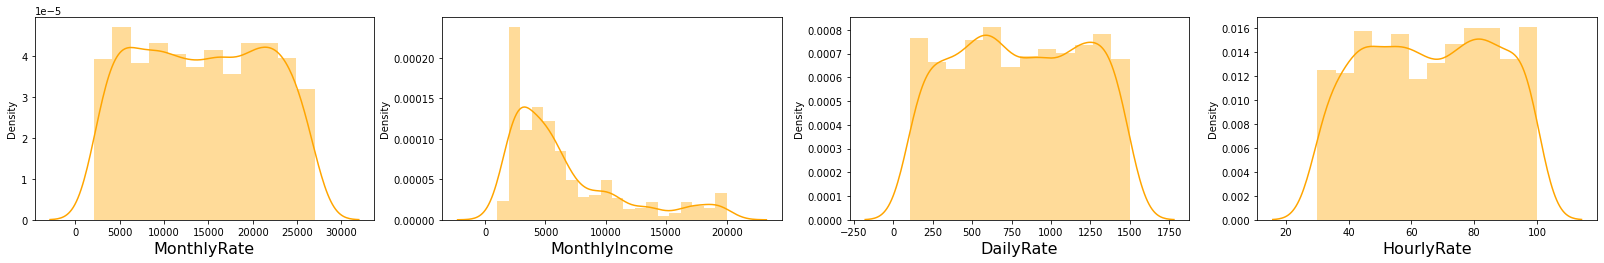

In [31]:
# checking skewness
plot_name=sns.distplot
plot(['MonthlyRate','MonthlyIncome','DailyRate','HourlyRate'])

MonthlyIncome has right skewed distribution. Others are looking almost normal. 

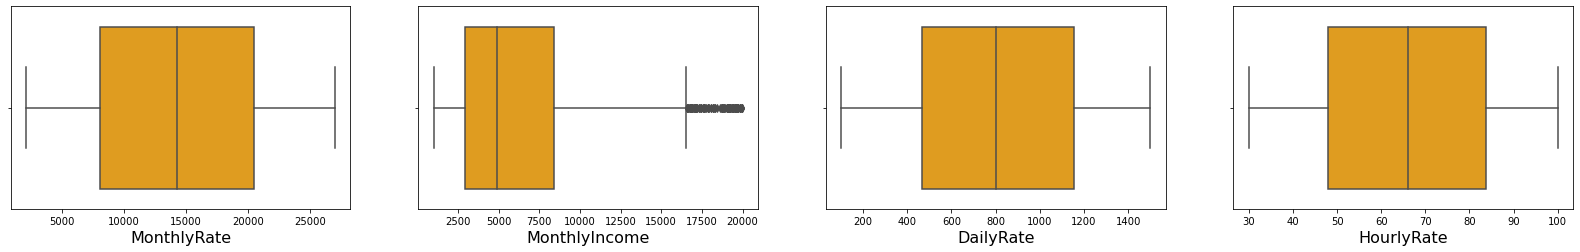

In [32]:
# checking outliers
plot_name=sns.boxplot
plot(['MonthlyRate','MonthlyIncome','DailyRate','HourlyRate'])

In [33]:
# checking skewness
df['MonthlyIncome'].skew()

1.3698166808390662

In [34]:
# let's reduce skewness of MonthlyIncome
df['MonthlyIncome']=np.log(df['MonthlyIncome'])
df['MonthlyIncome'].skew()

0.2861922926389174

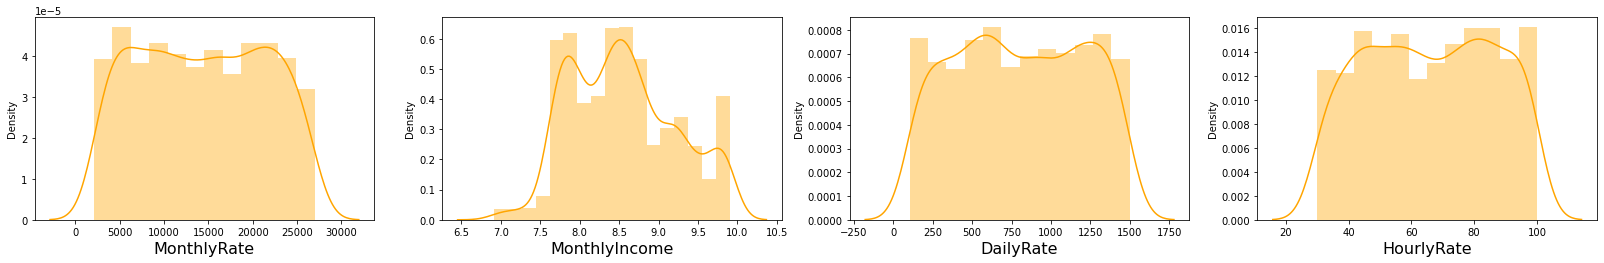

In [35]:
# again checking skewness
plot_name=sns.distplot
plot(['MonthlyRate','MonthlyIncome','DailyRate','HourlyRate'])

now it is better

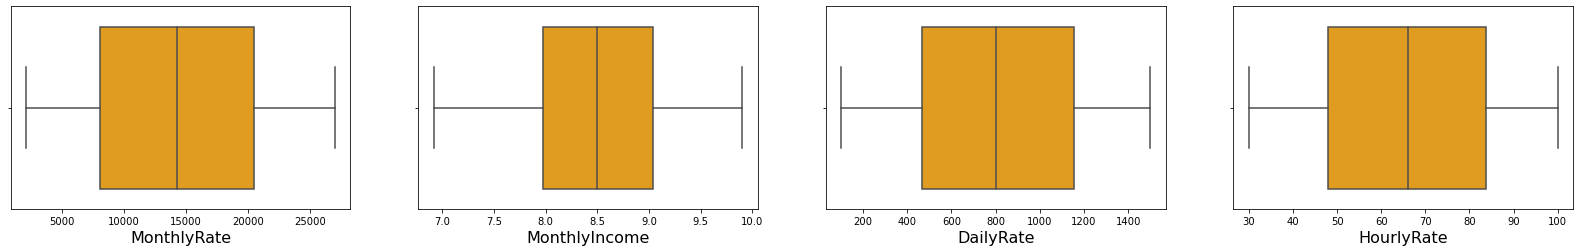

In [36]:
# again checking outliers
plot_name=sns.boxplot
plot(['MonthlyRate','MonthlyIncome','DailyRate','HourlyRate'])

By reducing skewness, outliers have also removed. 

In [37]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.494310,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.012503,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,0.005683,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.121069,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.015635,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.017349,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.017135,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.920027,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.004626,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.494310,0.012503,0.005683,0.121069,-0.015635,-0.017349,-0.017135,0.920027,-0.004626,1.000000,...,-0.024556,0.007295,0.021517,0.740619,-0.031546,0.033449,0.507924,0.407622,0.337519,0.381366


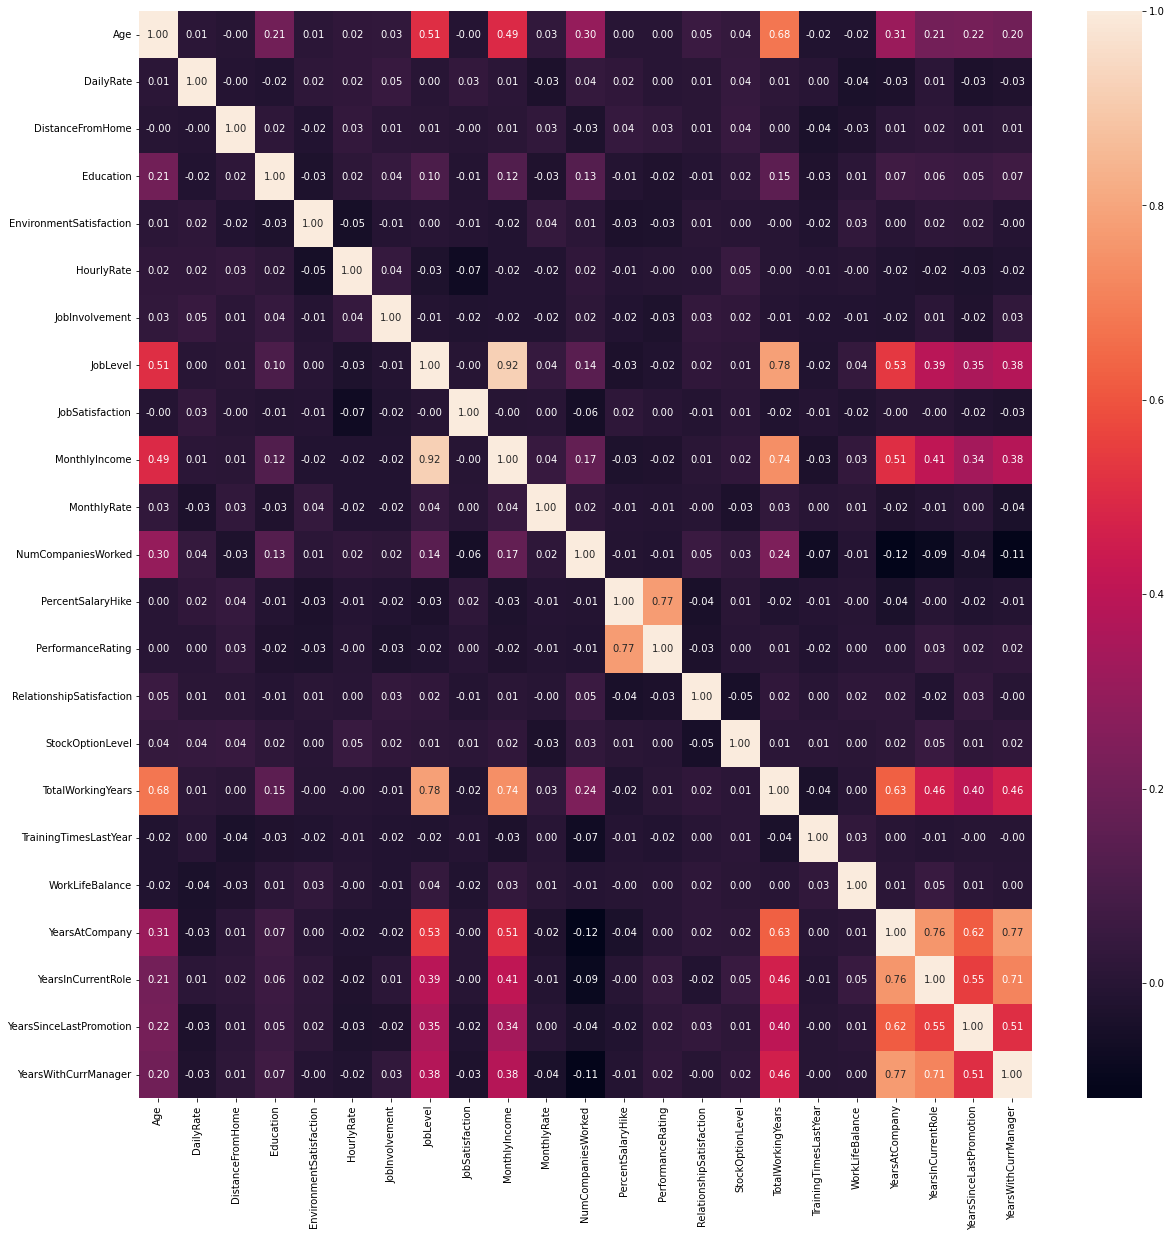

In [38]:
# heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,fmt=".2f")
plt.show()

1) MonthlyIncome, JobLevel and TotalworkingYears have positive correlation.                                                     
2) PerformanceRating and PercentSalaryHike have positive correlation.                                                
3) YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, TotalWorkingYears nad YearsWithCurrentManager have positive correlation.

In [39]:
# separating target variable and features
x = df.drop(columns='Attrition')      # features
y= df['Attrition']                    # target variable

In [40]:
# separating categorical columns
cat_columns = []
for i in x.columns:
    if x[i].dtypes=="object":
        cat_columns.append(i)

print('categorical columns =',cat_columns)

categorical columns = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


In [41]:
# encoding categorical columns
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in cat_columns:
    x[i] = OE.fit_transform(x[i].values.reshape(-1,1))
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2.0,1102,2.0,1,2,1.0,2,0.0,94,...,3,1,0,8,0,1,6,4,0,5
1,49,1.0,279,1.0,8,1,1.0,3,1.0,61,...,4,4,1,10,3,3,10,7,1,7
2,37,2.0,1373,1.0,2,2,4.0,4,1.0,92,...,3,2,0,7,3,3,0,0,0,0
3,33,1.0,1392,1.0,3,4,1.0,4,0.0,56,...,3,3,0,8,3,3,8,7,3,0
4,27,2.0,591,1.0,2,1,3.0,1,1.0,40,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1.0,884,1.0,23,2,3.0,3,1.0,41,...,3,3,1,17,3,3,5,2,0,3
1466,39,2.0,613,1.0,6,1,3.0,4,1.0,42,...,3,1,1,9,5,3,7,7,1,7
1467,27,2.0,155,1.0,4,3,1.0,2,1.0,87,...,4,2,1,6,0,3,6,2,0,3
1468,49,1.0,1023,2.0,2,3,3.0,4,1.0,63,...,3,4,0,17,3,2,9,6,0,8


In [42]:
# features scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

In [43]:
x = pd.DataFrame(x_scaler,columns=x.columns)
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,0.590048,0.742527,1.401512,-1.010909,-0.891688,-0.937414,-0.660531,-1.224745,1.383138,...,-0.426230,-1.584178,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,-0.913194,-1.297775,-0.493817,-0.147150,-1.868426,-0.937414,0.254625,0.816497,-0.240677,...,2.346151,1.191438,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,0.590048,1.414363,-0.493817,-0.887515,-0.891688,1.316673,1.169781,0.816497,1.284725,...,-0.426230,-0.658973,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,-0.913194,1.461466,-0.493817,-0.764121,1.061787,-0.937414,1.169781,-1.224745,-0.486709,...,-0.426230,0.266233,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,0.590048,-0.524295,-0.493817,-0.887515,-1.868426,0.565311,-1.575686,0.816497,-1.274014,...,-0.426230,1.191438,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,-0.913194,0.202082,-0.493817,1.703764,-0.891688,0.565311,0.254625,0.816497,-1.224807,...,-0.426230,0.266233,0.241988,0.735447,0.155707,0.338096,-0.327893,-0.615492,-0.679146,-0.314873
1466,0.227347,0.590048,-0.469754,-0.493817,-0.393938,-1.868426,0.565311,1.169781,0.816497,-1.175601,...,-0.426230,-1.584178,0.241988,-0.293077,1.707500,0.338096,-0.001333,0.764998,-0.368715,0.806541
1467,-1.086676,0.590048,-1.605183,-0.493817,-0.640727,0.085049,-0.937414,-0.660531,0.816497,1.038693,...,2.346151,-0.658973,0.241988,-0.678774,-2.171982,0.338096,-0.164613,-0.615492,-0.679146,-0.314873
1468,1.322365,-0.913194,0.546677,1.401512,-0.887515,0.085049,0.565311,1.169781,0.816497,-0.142264,...,-0.426230,1.191438,-0.932014,0.735447,0.155707,-1.077862,0.325228,0.488900,-0.679146,1.086895


In [44]:
# checking variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features']=x.columns
vif['vif values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,Features,vif values
0,Age,2.050850
1,BusinessTravel,1.015646
2,DailyRate,1.023997
3,Department,1.931454
4,DistanceFromHome,1.012360
5,Education,1.065933
6,EducationField,1.016253
7,EnvironmentSatisfaction,1.019314
8,Gender,1.019112
9,HourlyRate,1.020142


Here all vif values are less than 10.

In [45]:
# replacing values
y = y.replace(['Yes','No'],[1,0])
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [46]:
# value count
y.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

here 1 is 16.12% of total data and 0 is 83.88% of total data. Our dataset is imbalance.

In [47]:
# balancing data
from imblearn.over_sampling import SMOTE
SM = SMOTE(sampling_strategy=0.75)
x,y = SM.fit_resample(x,y)
print(x.shape)
print(y.shape)

(2157, 30)
(2157,)


In [48]:
y.value_counts()

0    1233
1     924
Name: Attrition, dtype: int64

#### Models

In [49]:
# importing required libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report,roc_curve,confusion_matrix,auc,roc_auc_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [50]:
# models name
LR = LogisticRegression()
RFC = RandomForestClassifier()
DTC = DecisionTreeClassifier()
KNN = KNeighborsClassifier()
ETC = ExtraTreesClassifier()
svc = SVC()

In [51]:
# train-test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=171)

In [52]:
# LogisticRegression model 
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
acc_score = accuracy_score(y_test,y_pred)
CM = confusion_matrix(y_test,y_pred)
CR = classification_report(y_test,y_pred)
print('Accuracy score =',acc_score,'\n\nconfusion matrix:-\n',CM,'\n\nclassification report:-\n',CR)

print('checking Cross validation score:-\n')
score_cv = cross_val_score(LR,x,y,cv=10)
cv_mean = score_cv.mean()
diff = (acc_score - cv_mean)
print('cross validation scores:-',score_cv,'\ncross validation mean score =',cv_mean,
          '\nDifference between accuracy score and cross validation mean score =',diff)

Accuracy score = 0.7685185185185185 

confusion matrix:-
 [[309  59]
 [ 91 189]] 

classification report:-
               precision    recall  f1-score   support

           0       0.77      0.84      0.80       368
           1       0.76      0.68      0.72       280

    accuracy                           0.77       648
   macro avg       0.77      0.76      0.76       648
weighted avg       0.77      0.77      0.77       648

checking Cross validation score:-

cross validation scores:- [0.7962963  0.77777778 0.76388889 0.80092593 0.78703704 0.81481481
 0.78240741 0.74883721 0.81860465 0.78139535] 
cross validation mean score = 0.7871985357450474 
Difference between accuracy score and cross validation mean score = -0.0186800172265289


In [53]:
# RandomForestClassifier model
RFC.fit(x_train,y_train)
y_pred=RFC.predict(x_test)
acc_score = accuracy_score(y_test,y_pred)
CM = confusion_matrix(y_test,y_pred)
CR = classification_report(y_test,y_pred)
print('Accuracy score =',acc_score,'\n\nconfusion matrix:-\n',CM,'\n\nclassification report:-\n',CR)

print('checking Cross validation score:-\n')
score_cv = cross_val_score(RFC,x,y,cv=10)
cv_mean = score_cv.mean()
diff = (acc_score - cv_mean)
print('cross validation scores:-',score_cv,'\ncross validation mean score =',cv_mean,
          '\nDifference between accuracy score and cross validation mean score =',diff)

Accuracy score = 0.9027777777777778 

confusion matrix:-
 [[353  15]
 [ 48 232]] 

classification report:-
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       368
           1       0.94      0.83      0.88       280

    accuracy                           0.90       648
   macro avg       0.91      0.89      0.90       648
weighted avg       0.91      0.90      0.90       648

checking Cross validation score:-

cross validation scores:- [0.84722222 0.7962963  0.84259259 0.96759259 0.98611111 0.97222222
 0.96759259 0.98139535 0.97674419 0.97209302] 
cross validation mean score = 0.9309862187769165 
Difference between accuracy score and cross validation mean score = -0.028208440999138662


In [54]:
# KNeighborsClassifier model
KNN.fit(x_train,y_train)
y_pred=KNN.predict(x_test)
acc_score = accuracy_score(y_test,y_pred)
CM = confusion_matrix(y_test,y_pred)
CR = classification_report(y_test,y_pred)
print('Accuracy score =',acc_score,'\n\nconfusion matrix:-\n',CM,'\n\nclassification report:-\n',CR)

print('checking Cross validation score:-\n')
score_cv = cross_val_score(KNN,x,y,cv=10)
cv_mean = score_cv.mean()
diff = (acc_score - cv_mean)
print('cross validation scores:-',score_cv,'\ncross validation mean score =',cv_mean,
          '\nDifference between accuracy score and cross validation mean score =',diff)

Accuracy score = 0.8287037037037037 

confusion matrix:-
 [[272  96]
 [ 15 265]] 

classification report:-
               precision    recall  f1-score   support

           0       0.95      0.74      0.83       368
           1       0.73      0.95      0.83       280

    accuracy                           0.83       648
   macro avg       0.84      0.84      0.83       648
weighted avg       0.86      0.83      0.83       648

checking Cross validation score:-

cross validation scores:- [0.76388889 0.83796296 0.83796296 0.84722222 0.83333333 0.8287037
 0.81944444 0.78139535 0.8372093  0.81860465] 
cross validation mean score = 0.82057278208441 
Difference between accuracy score and cross validation mean score = 0.00813092161929374


In [55]:
# Support vector Machines model
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
acc_score = accuracy_score(y_test,y_pred)
CM = confusion_matrix(y_test,y_pred)
CR = classification_report(y_test,y_pred)
print('Accuracy score =',acc_score,'\n\nconfusion matrix:-\n',CM,'\n\nclassification report:-\n',CR)

print('checking Cross validation score:-\n')
score_cv = cross_val_score(svc,x,y,cv=10)
cv_mean = score_cv.mean()
diff = (acc_score - cv_mean)
print('cross validation scores:-',score_cv,'\ncross validation mean score =',cv_mean,
          '\nDifference between accuracy score and cross validation mean score =',diff)

Accuracy score = 0.8688271604938271 

confusion matrix:-
 [[334  34]
 [ 51 229]] 

classification report:-
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       368
           1       0.87      0.82      0.84       280

    accuracy                           0.87       648
   macro avg       0.87      0.86      0.87       648
weighted avg       0.87      0.87      0.87       648

checking Cross validation score:-

cross validation scores:- [0.85185185 0.87962963 0.87037037 0.9212963  0.93518519 0.93055556
 0.9212963  0.87906977 0.92093023 0.89767442] 
cross validation mean score = 0.9007859603789837 
Difference between accuracy score and cross validation mean score = -0.0319587998851566


In [56]:
# ExtraTreesclassifier model
ETC.fit(x_train,y_train)
y_pred=ETC.predict(x_test)
acc_score = accuracy_score(y_test,y_pred)
CM = confusion_matrix(y_test,y_pred)
CR = classification_report(y_test,y_pred)
print('Accuracy score =',acc_score,'\n\nconfusion matrix:-\n',CM,'\n\nclassification report:-\n',CR)

print('checking Cross validation score:-\n')
score_cv = cross_val_score(ETC,x,y,cv=10)
cv_mean = score_cv.mean()
diff = (acc_score - cv_mean)
print('cross validation scores:-',score_cv,'\ncross validation mean score =',cv_mean,
          '\nDifference between accuracy score and cross validation mean score =',diff)

Accuracy score = 0.9305555555555556 

confusion matrix:-
 [[353  15]
 [ 30 250]] 

classification report:-
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       368
           1       0.94      0.89      0.92       280

    accuracy                           0.93       648
   macro avg       0.93      0.93      0.93       648
weighted avg       0.93      0.93      0.93       648

checking Cross validation score:-

cross validation scores:- [0.92592593 0.89814815 0.89814815 0.98611111 0.98611111 0.97685185
 0.97222222 0.97674419 0.99534884 0.98139535] 
cross validation mean score = 0.959700689061154 
Difference between accuracy score and cross validation mean score = -0.029145133505598442


In [57]:
# DecisionTreeClassifier model
DTC.fit(x_train,y_train)
y_pred=DTC.predict(x_test)
acc_score = accuracy_score(y_test,y_pred)
CM = confusion_matrix(y_test,y_pred)
CR = classification_report(y_test,y_pred)
print('Accuracy score =',acc_score,'\n\nconfusion matrix:-\n',CM,'\n\nclassification report:-\n',CR)

print('checking Cross validation score:-\n')
score_cv = cross_val_score(DTC,x,y,cv=10)
cv_mean = score_cv.mean()
diff = (acc_score - cv_mean)
print('cross validation scores:-',score_cv,'\ncross validation mean score =',cv_mean,
          '\nDifference between accuracy score and cross validation mean score =',diff)

Accuracy score = 0.8256172839506173 

confusion matrix:-
 [[307  61]
 [ 52 228]] 

classification report:-
               precision    recall  f1-score   support

           0       0.86      0.83      0.84       368
           1       0.79      0.81      0.80       280

    accuracy                           0.83       648
   macro avg       0.82      0.82      0.82       648
weighted avg       0.83      0.83      0.83       648

checking Cross validation score:-

cross validation scores:- [0.69907407 0.73148148 0.74074074 0.91203704 0.87037037 0.91203704
 0.86574074 0.90232558 0.8744186  0.90697674] 
cross validation mean score = 0.841520241171404 
Difference between accuracy score and cross validation mean score = -0.015902957220786718


Our best model is KNeighborsClassifier. It has least difference between the accuracy score and cross validation mean score.

#### Hyperparameter tuning

In [58]:
# parameters for KNN models
param = {'n_neighbors':[3,5,9,14,],
         'algorithm':['auto','ball_tree','kd_tree','brute'],
         'leaf_size':[30,40,70],
         'n_jobs':[-2,-1,1]
          }

GSCV= GridSearchCV(estimator=KNN,param_grid=param,cv=5)
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [30, 40, 70], 'n_jobs': [-2, -1, 1],
                         'n_neighbors': [3, 5, 9, 14]})

In [59]:
# finding best parameter value
GSCV.best_params_

{'algorithm': 'auto', 'leaf_size': 30, 'n_jobs': -2, 'n_neighbors': 3}

In [60]:
# using best parameter value
Model = KNeighborsClassifier(n_neighbors=3,algorithm='auto',leaf_size=30,n_jobs=-2)

In [61]:
# final model
Model.fit(x_train,y_train)
y_pred=Model.predict(x_test)
acc_score = accuracy_score(y_test,y_pred)
CM = confusion_matrix(y_test,y_pred)
CR = classification_report(y_test,y_pred)
print('Accuracy score =',acc_score,'\n\nconfusion matrix:-\n',CM,'\n\nclassification report:-\n',CR)

Accuracy score = 0.8441358024691358 

confusion matrix:-
 [[279  89]
 [ 12 268]] 

classification report:-
               precision    recall  f1-score   support

           0       0.96      0.76      0.85       368
           1       0.75      0.96      0.84       280

    accuracy                           0.84       648
   macro avg       0.85      0.86      0.84       648
weighted avg       0.87      0.84      0.84       648



After using hyperparameter tuning accuracy score has increased.

In [62]:
# ROC curve
fpr,tpr,threshold =roc_curve(y_test,y_pred)
print('Threshold=',threshold,'\nFalse positive rate=',fpr,'\nTrue positive rate=',tpr)

Threshold= [2 1 0] 
False positive rate= [0.         0.24184783 1.        ] 
True positive rate= [0.         0.95714286 1.        ]


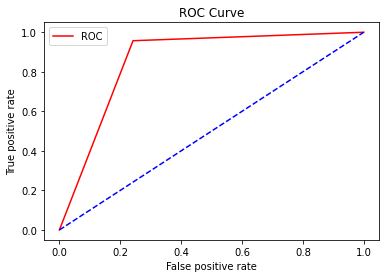

In [63]:
# plotting roc curve
plt.plot(fpr,tpr,color='red', label ='ROC')
plt.plot([0,1],[0,1], color = 'blue',linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [64]:
# AUC score
auc_score =roc_auc_score(y_test,y_pred)
print(auc_score)

0.8576475155279504


In [65]:
# saving model
import pickle
pickle.dump(Model,open('HR Analytics.pkl','wb'))